In [3]:
!pip install opencv3-python
!pip install matplotlib

  Could not find a version that satisfies the requirement opencv3-python (from versions: )
No matching distribution found for opencv3-python
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 13.0MB 115kB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 4.6MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 4.8MB/s eta 0:00:01
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Plot inline
%matplotlib inline
plt.rcParams["figure.figsize"] = (30,30)

# Imagem original

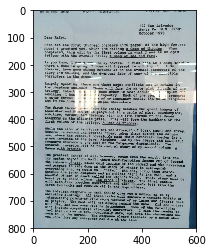

In [5]:
imgpath = '01.jpg'
img_color = cv2.imread(imgpath)
img_gray = cv2.imread(imgpath, 0)
img_minus1 = cv2.imread(imgpath, -1)
plt.imshow(img_color)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f71c83ec2e8>,
 <matplotlib.image.AxesImage at 0x7f71c839e080>)

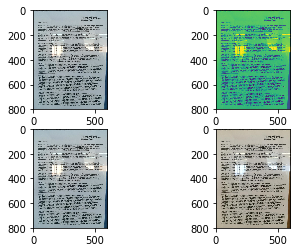

In [6]:
# The important part - Correct BGR to RGB channel
img1 = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 1),plt.imshow(img_color)
plt.subplot(2, 2, 2),plt.imshow(img_gray)
plt.subplot(2, 2, 3),plt.imshow(img_minus1)
plt.subplot(2, 2, 4),plt.imshow(img1)


# Apenas tirando o log

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


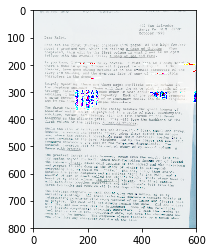

In [7]:
img = img_minus1
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
img_log = np.array(img_log,dtype=np.uint8)
plt.imshow(img_log)

# Criando e aplicando uma máscara de glare

In [8]:
def _imshow(I, theTitle=None):
    if len(I.shape) == 3:
        plt.imshow(I)
    else:
        if I.min() == 0 and I.max() == 1:
            plt.imshow(I, cmap="gray")
        else:
            plt.imshow(I, cmap="gray",vmin=0,vmax=255)
    plt.xticks([])
    plt.yticks([])
    if theTitle:
        plt.title(theTitle);

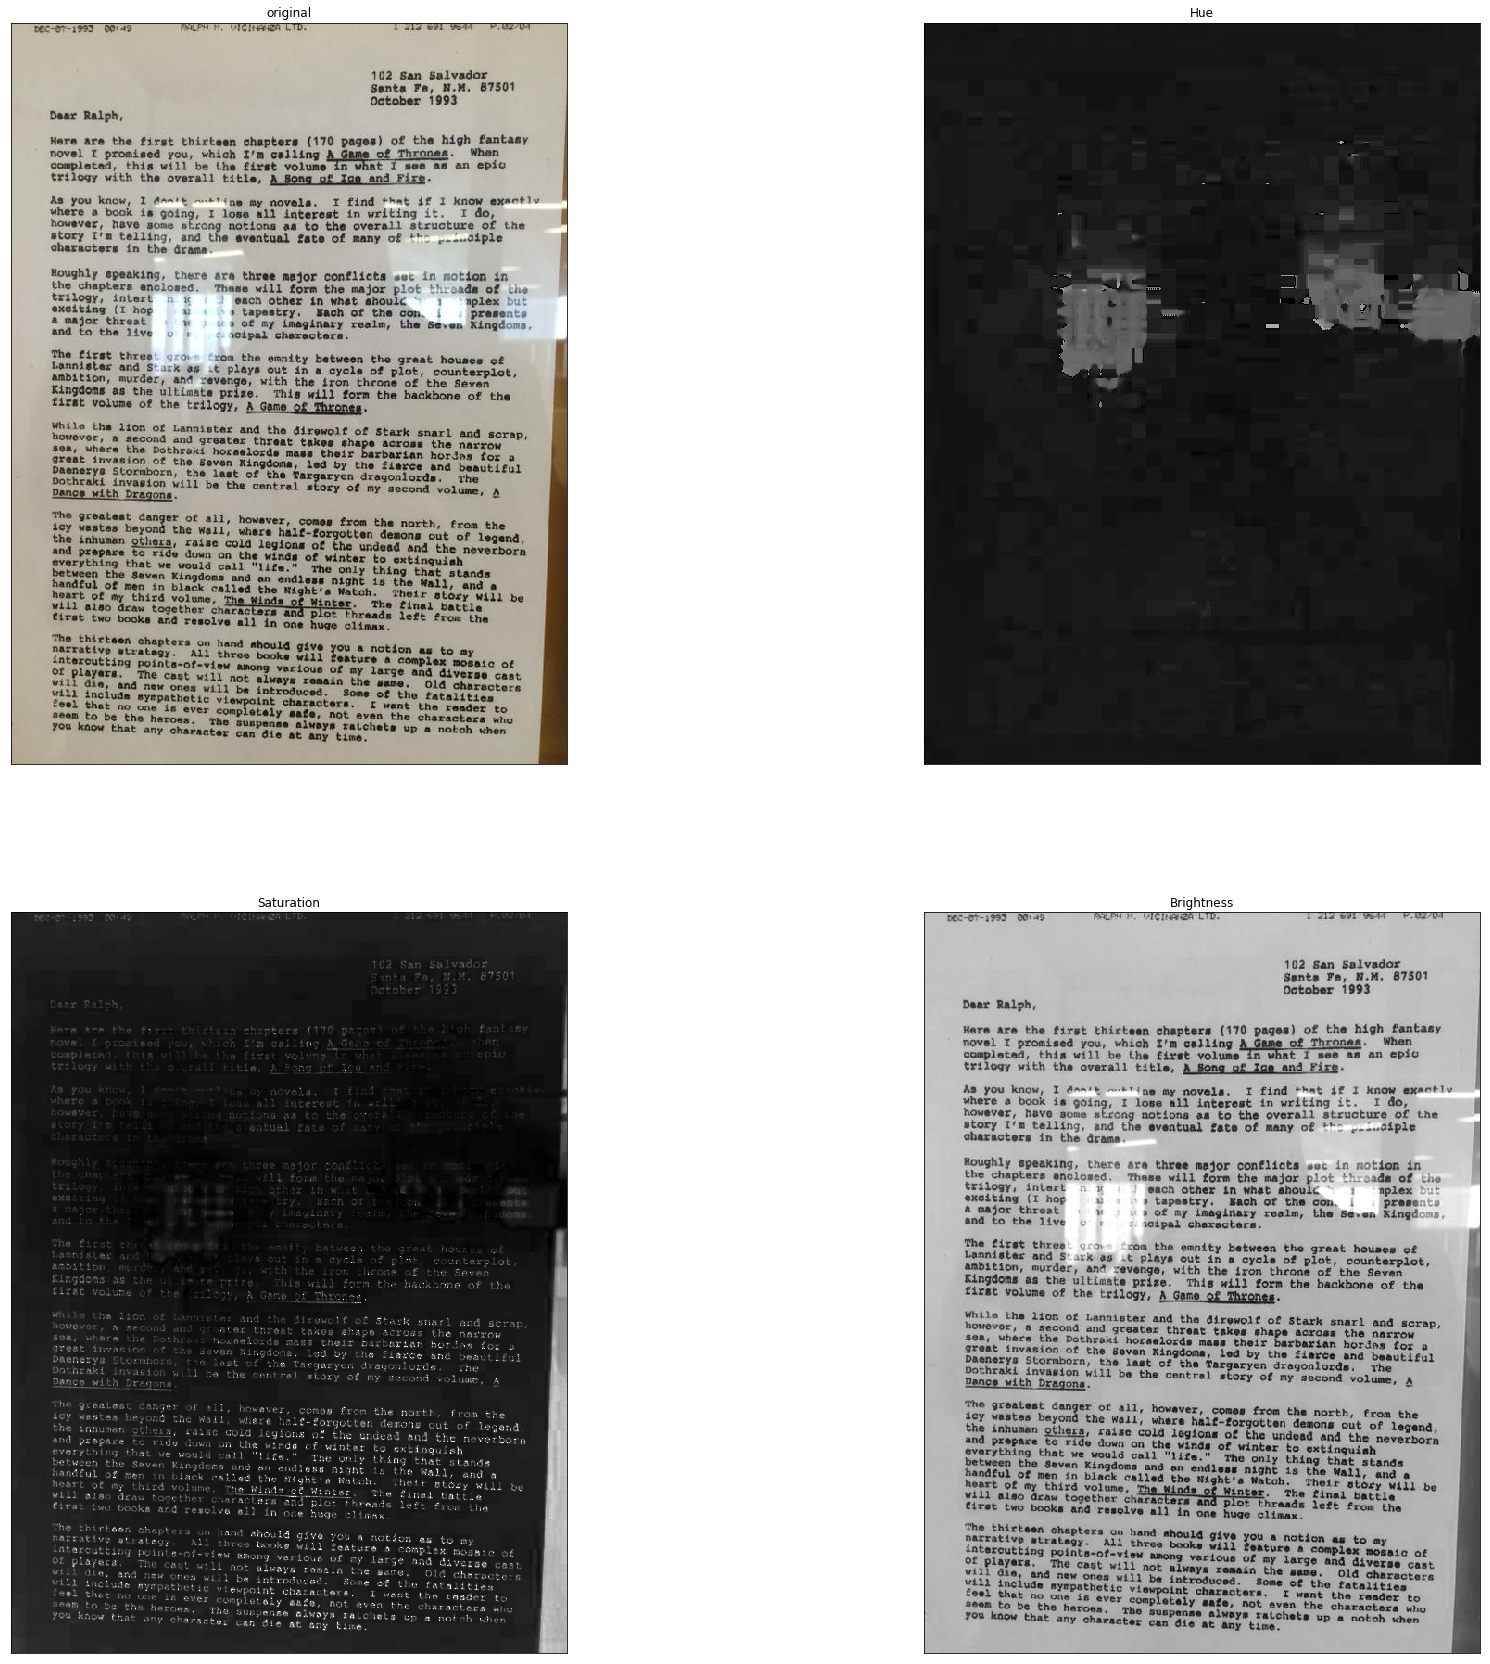

In [9]:
img = img_minus1

image_in = cv2.cvtColor(img, cv2.COLOR_BGR2RGB); # Load the glared image
h, s, v = cv2.split(cv2.cvtColor(image_in, cv2.COLOR_RGB2HSV)) # split into HSV components
plt.rcParams["figure.figsize"] = (30,30)
plt.subplot(2,2,1); _imshow(image_in, "original")
plt.subplot(2,2,2); _imshow(h, "Hue")
plt.subplot(2,2,3); _imshow(s, "Saturation")
plt.subplot(2,2,4); _imshow(v, "Brightness")


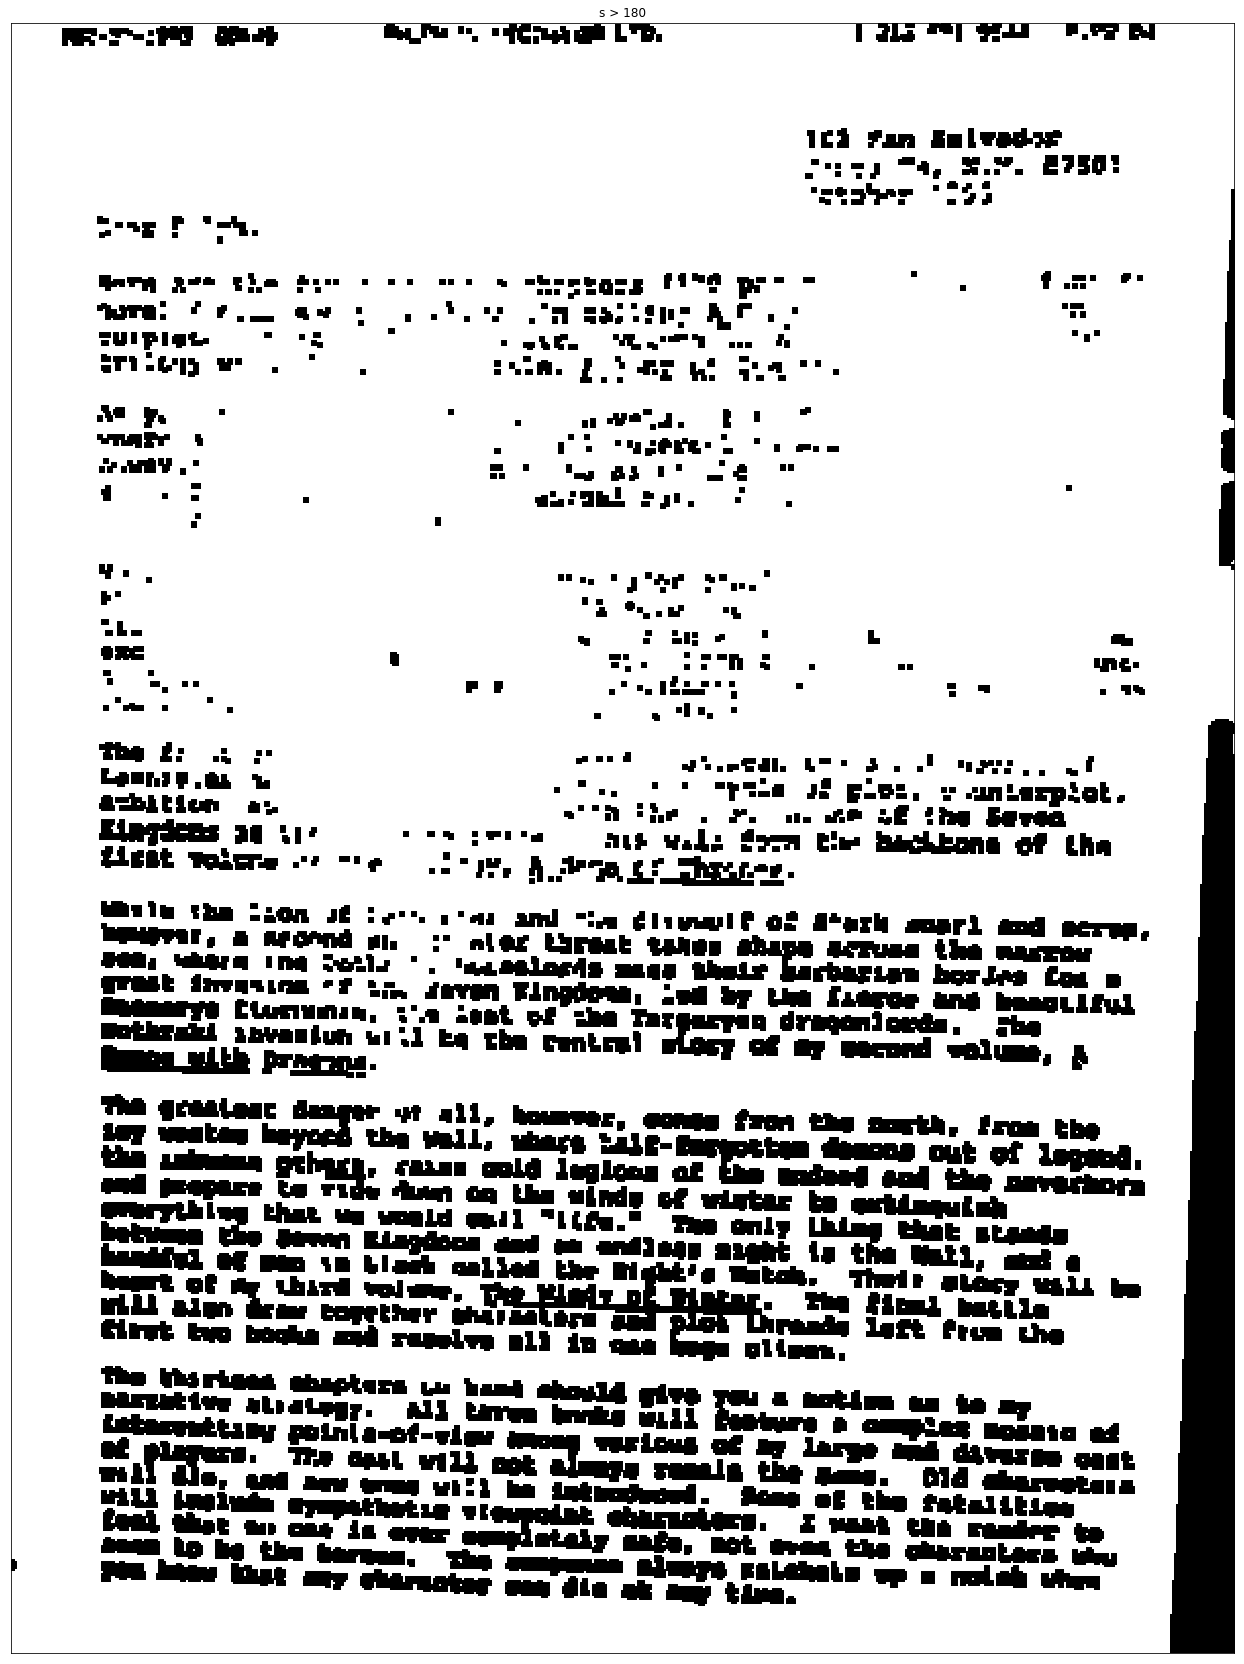

In [10]:
nonSat = s < 60 # Find all pixels that are not very saturated

# Slightly decrease the area of the non-satuared pixels by a erosion operation.
disk = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
nonSat = cv2.erode(nonSat.astype(np.uint8), disk)

# Set all brightness values, where the pixels are still saturated to 0.
v2 = v.copy()
v2[nonSat == 0] = 0;
_imshow(nonSat, "s > 180")
#plt.subplot(1,3,1); _imshow(nonSat, "s > 180")
#plt.subplot(1,3,2); _imshow(v, "Original\nBrightness")
#plt.subplot(1,3,3); _imshow(v2, "Masked\nBrightness")

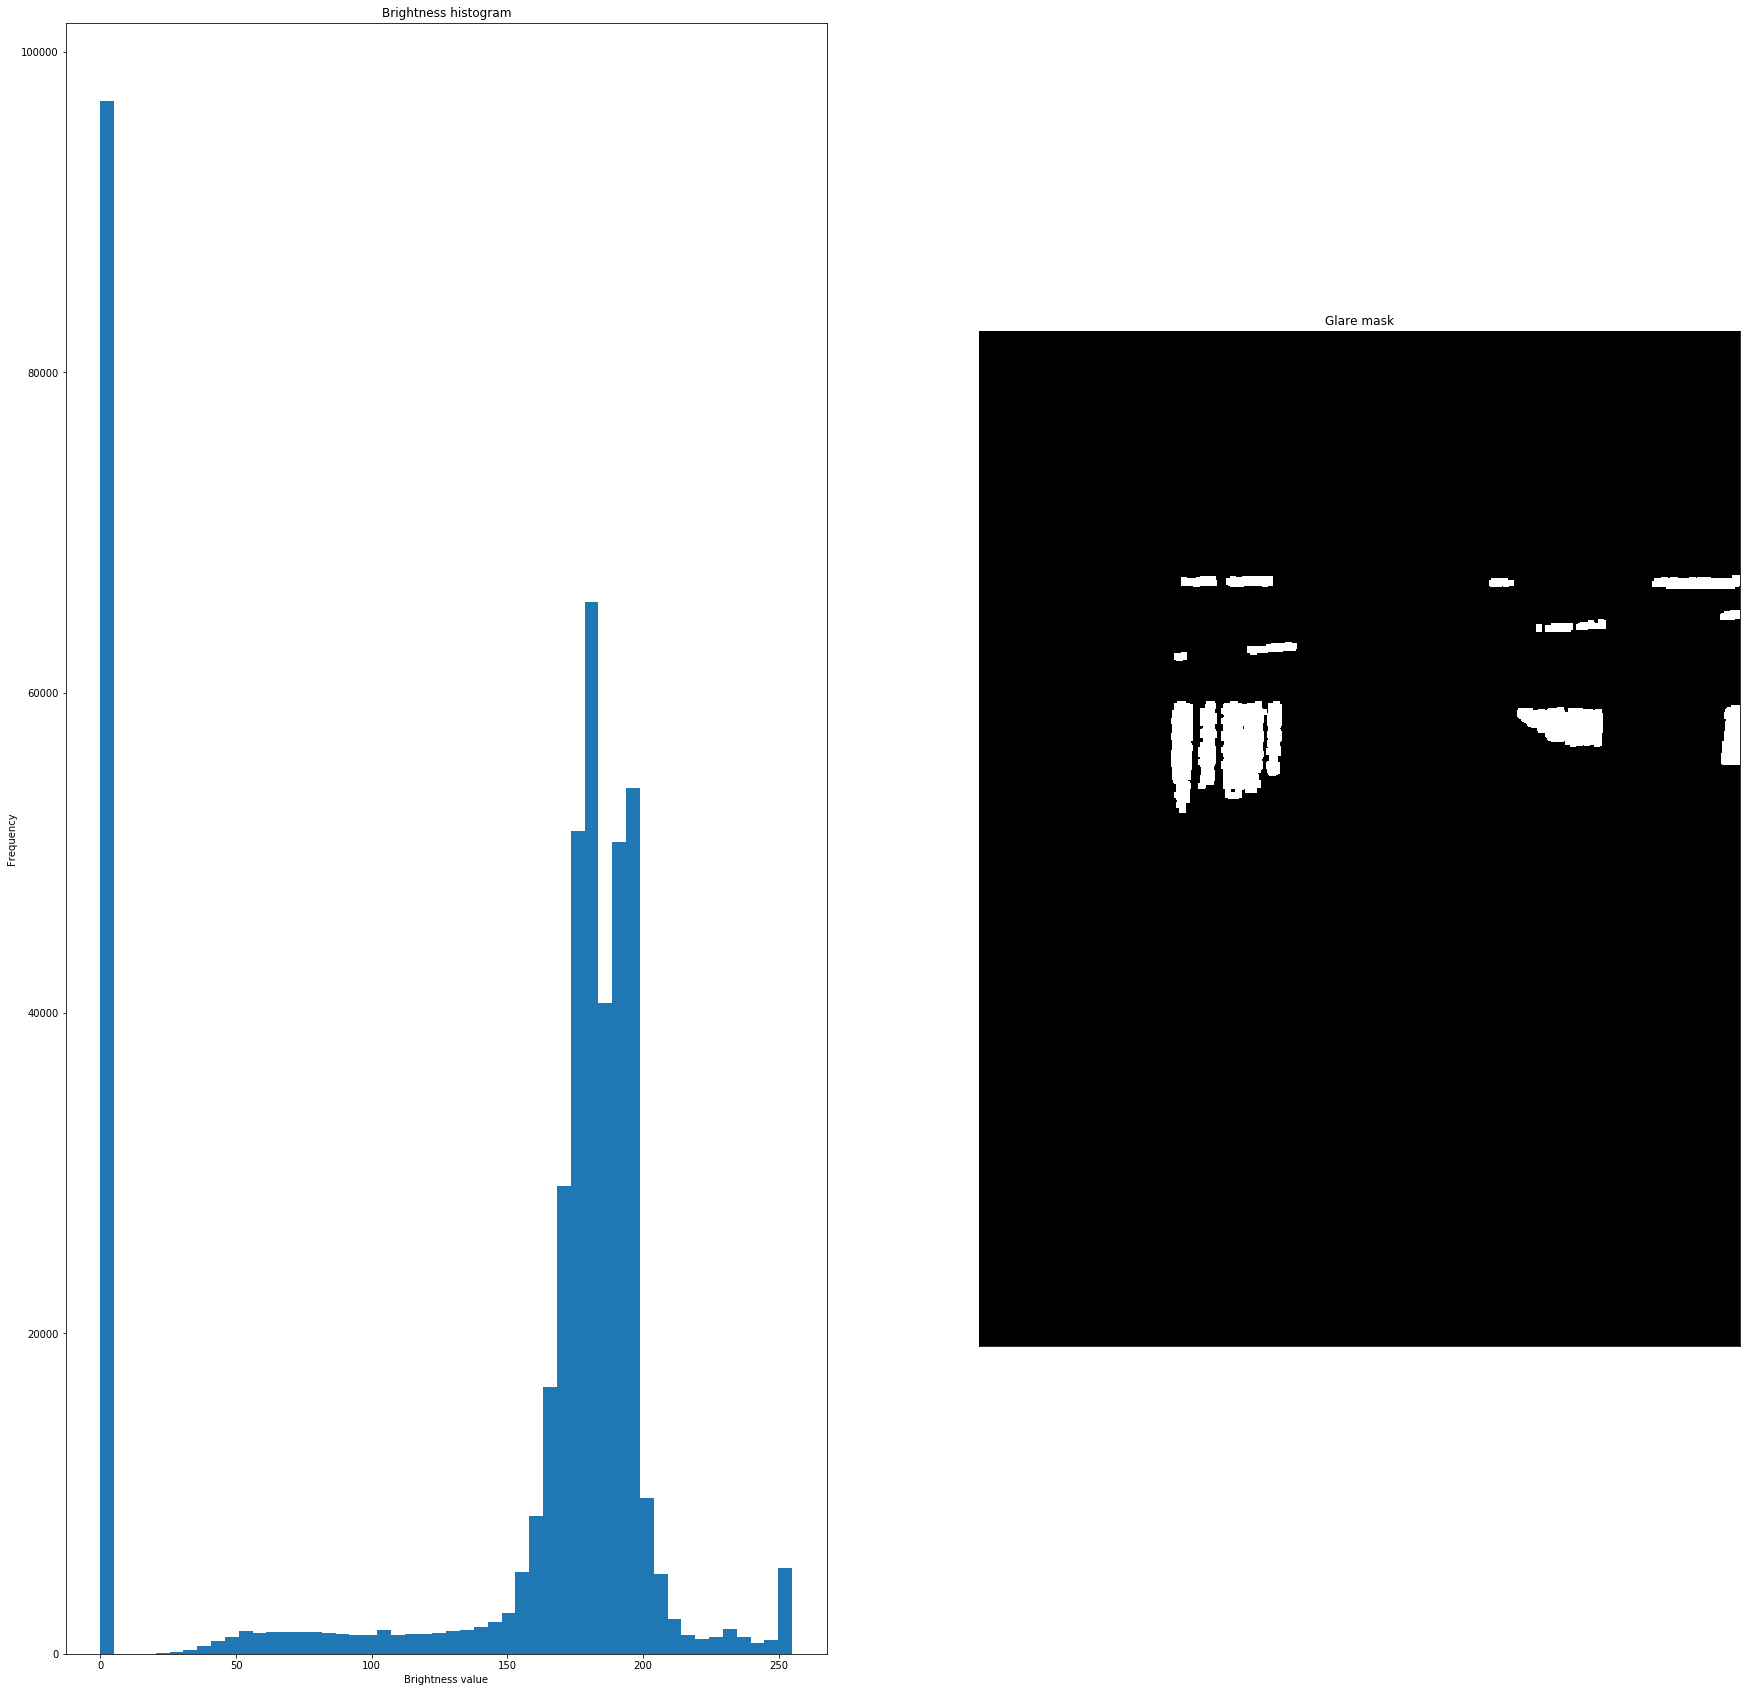

In [11]:
plt.subplot(1,2,1); plt.hist(v2.flatten(), bins=50);  # draw the histogram of pixel brightnesses
plt.xlabel("Brightness value");
plt.ylabel("Frequency");
plt.title("Brightness histogram")

glare = v2 > 253;    # filter out very bright pixels.
# Slightly increase the area for each pixel
glare = cv2.dilate(glare.astype(np.uint8), disk);  
glare = cv2.dilate(glare.astype(np.uint8), disk);
plt.subplot(1,2,2); _imshow(glare);
plt.title("Glare mask");

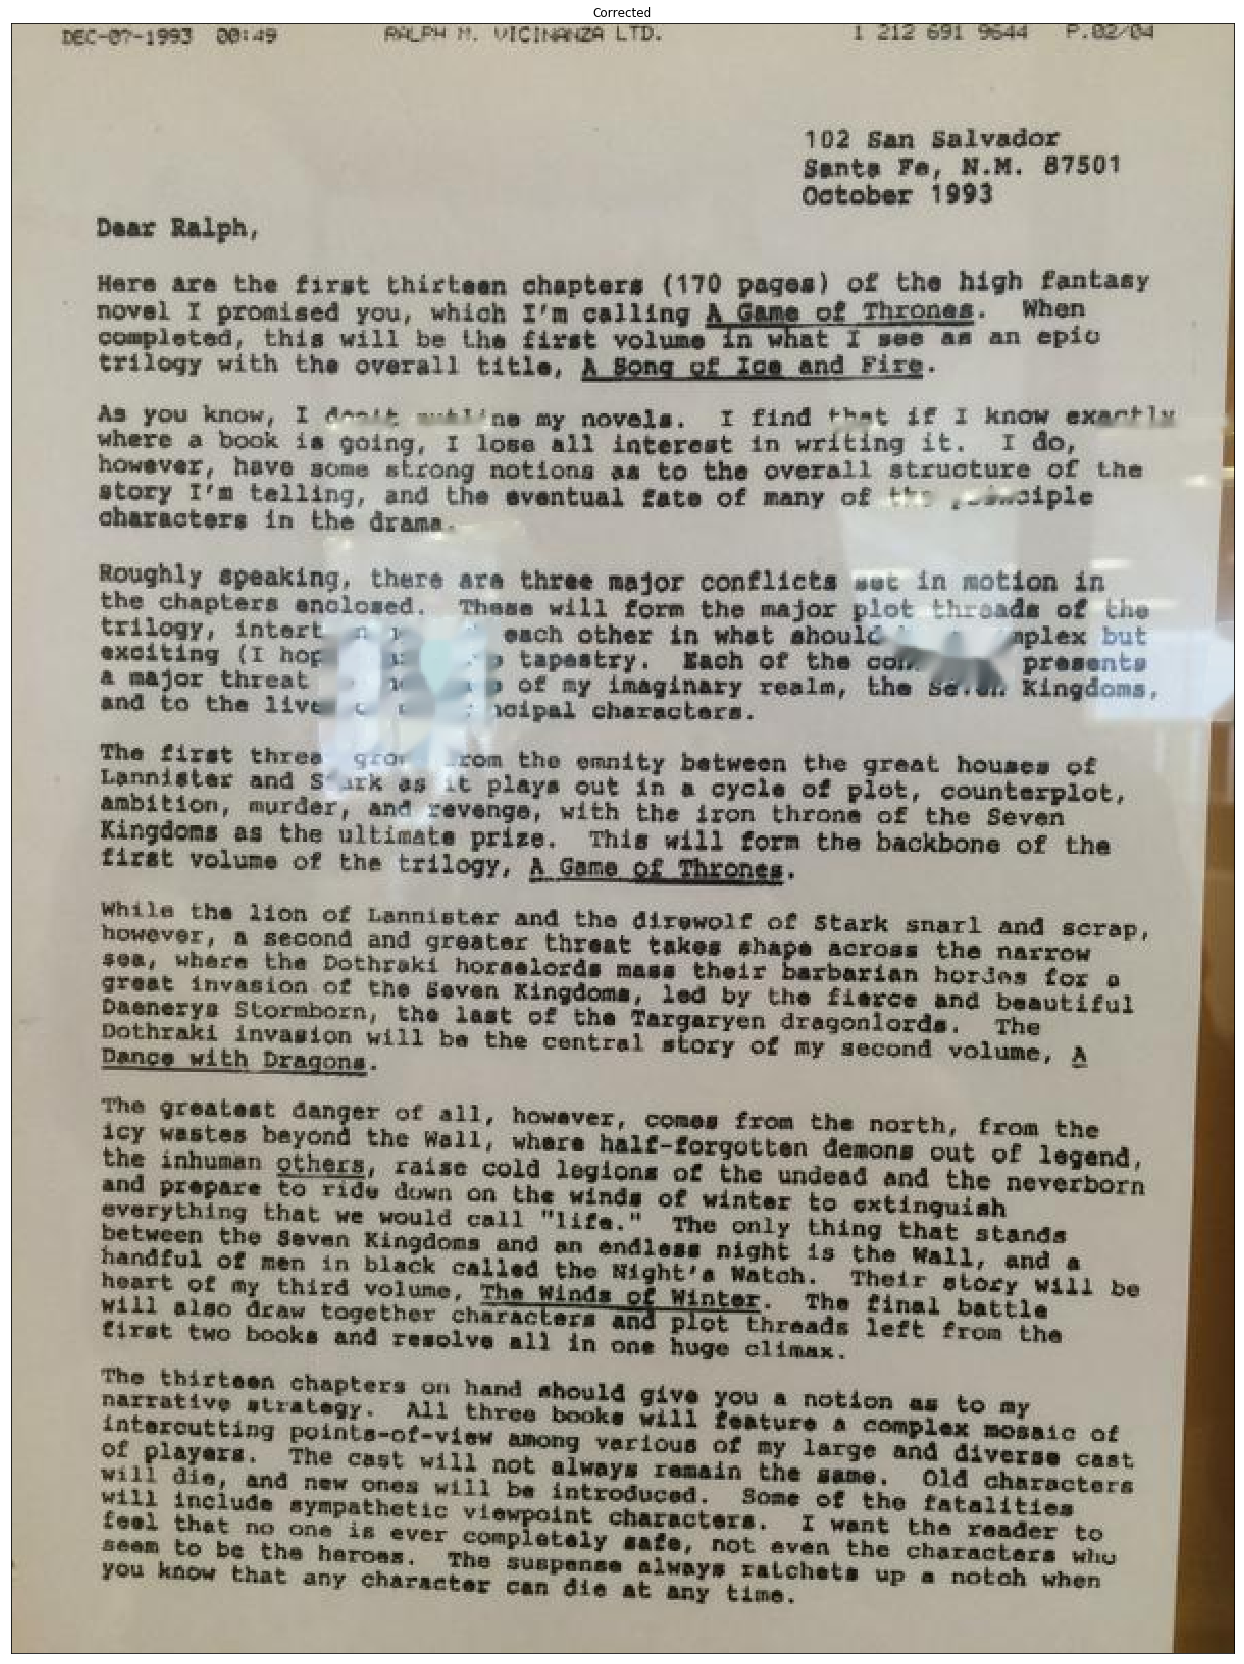

In [12]:
corrected = cv2.inpaint(image_in, glare, 5, cv2.INPAINT_NS)
#plt.subplot(1,3,1); _imshow(image_in, "Original")
#plt.subplot(1,3,2); _imshow(glare, "Glare Mask")
#plt.subplot(1,3,3); _imshow(corrected, "Corrected");
_imshow(corrected, "Corrected");

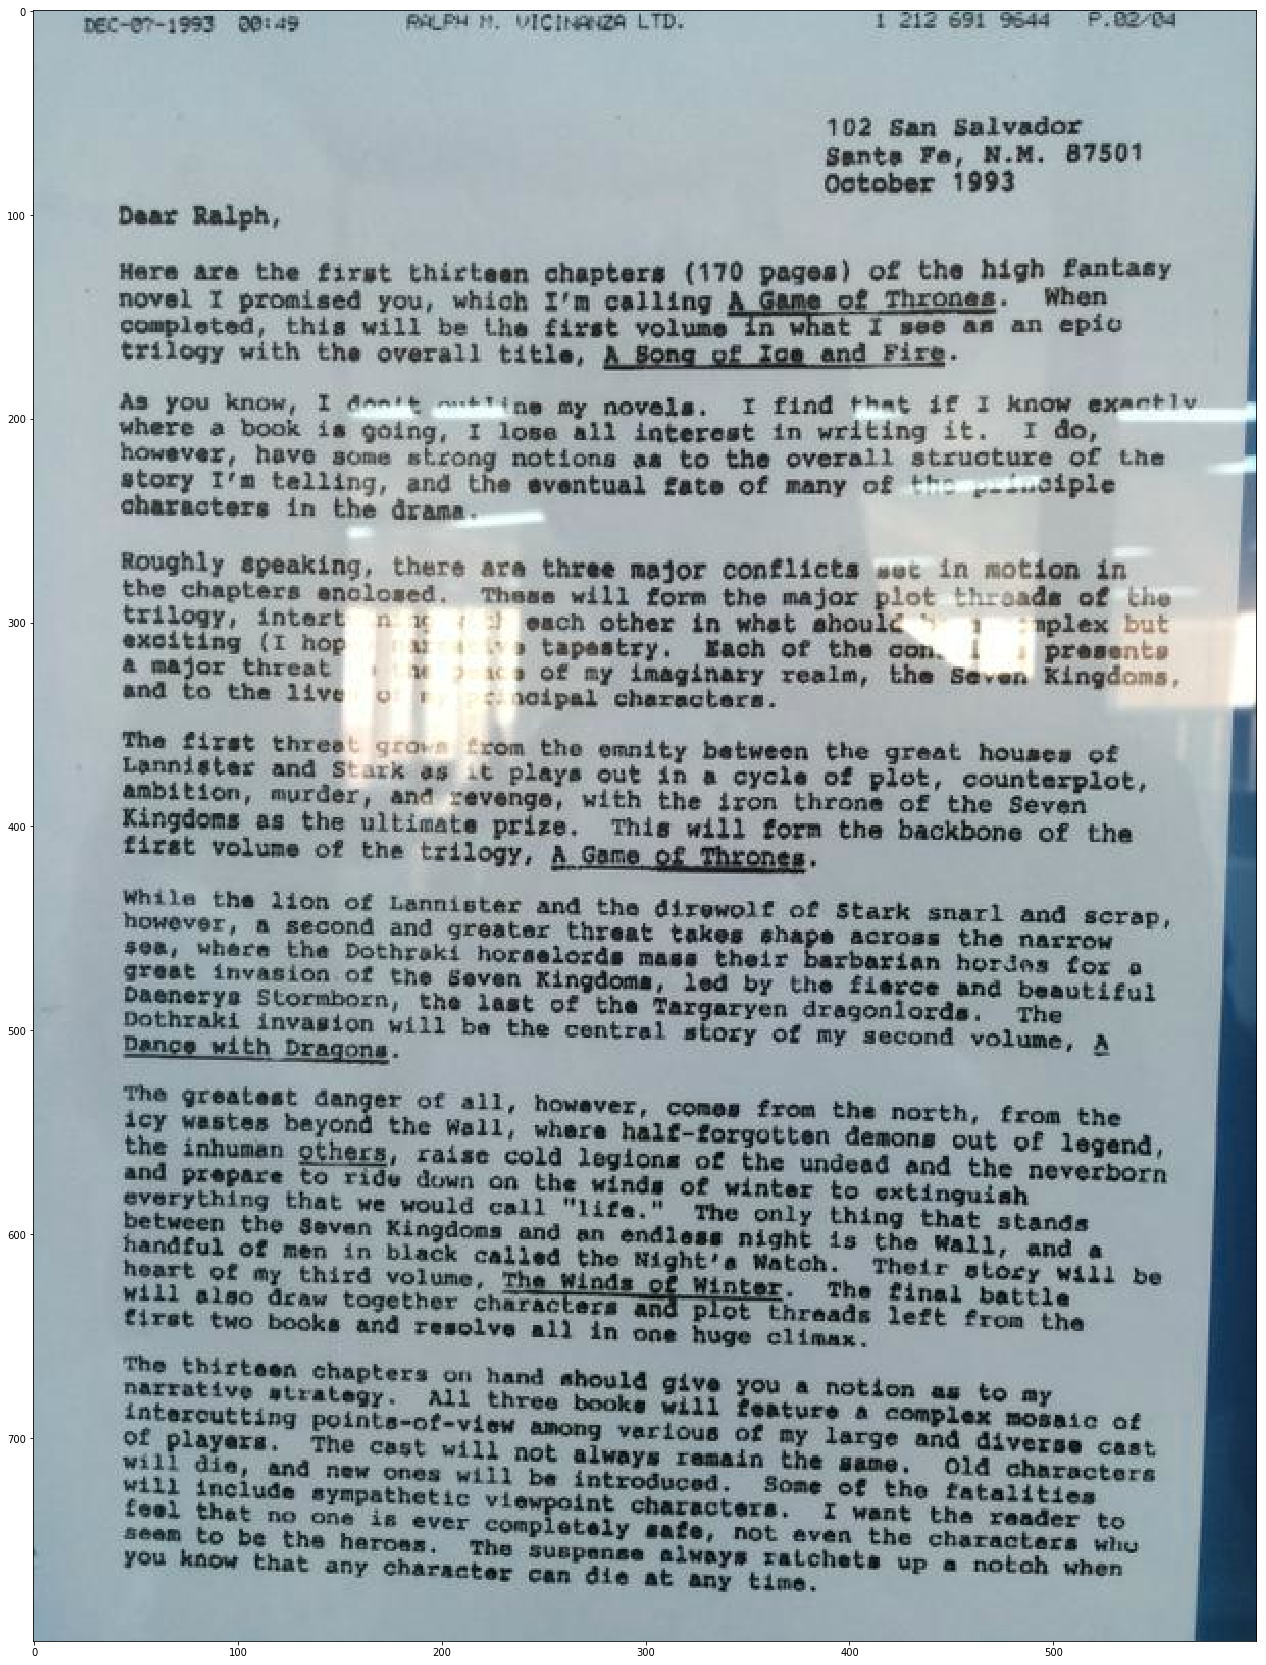

In [13]:
plt.imshow(img_color)

# Tentando criar uma máscara de cor

Tentei criar uma máscara a partir do branco pra deixar só o restante

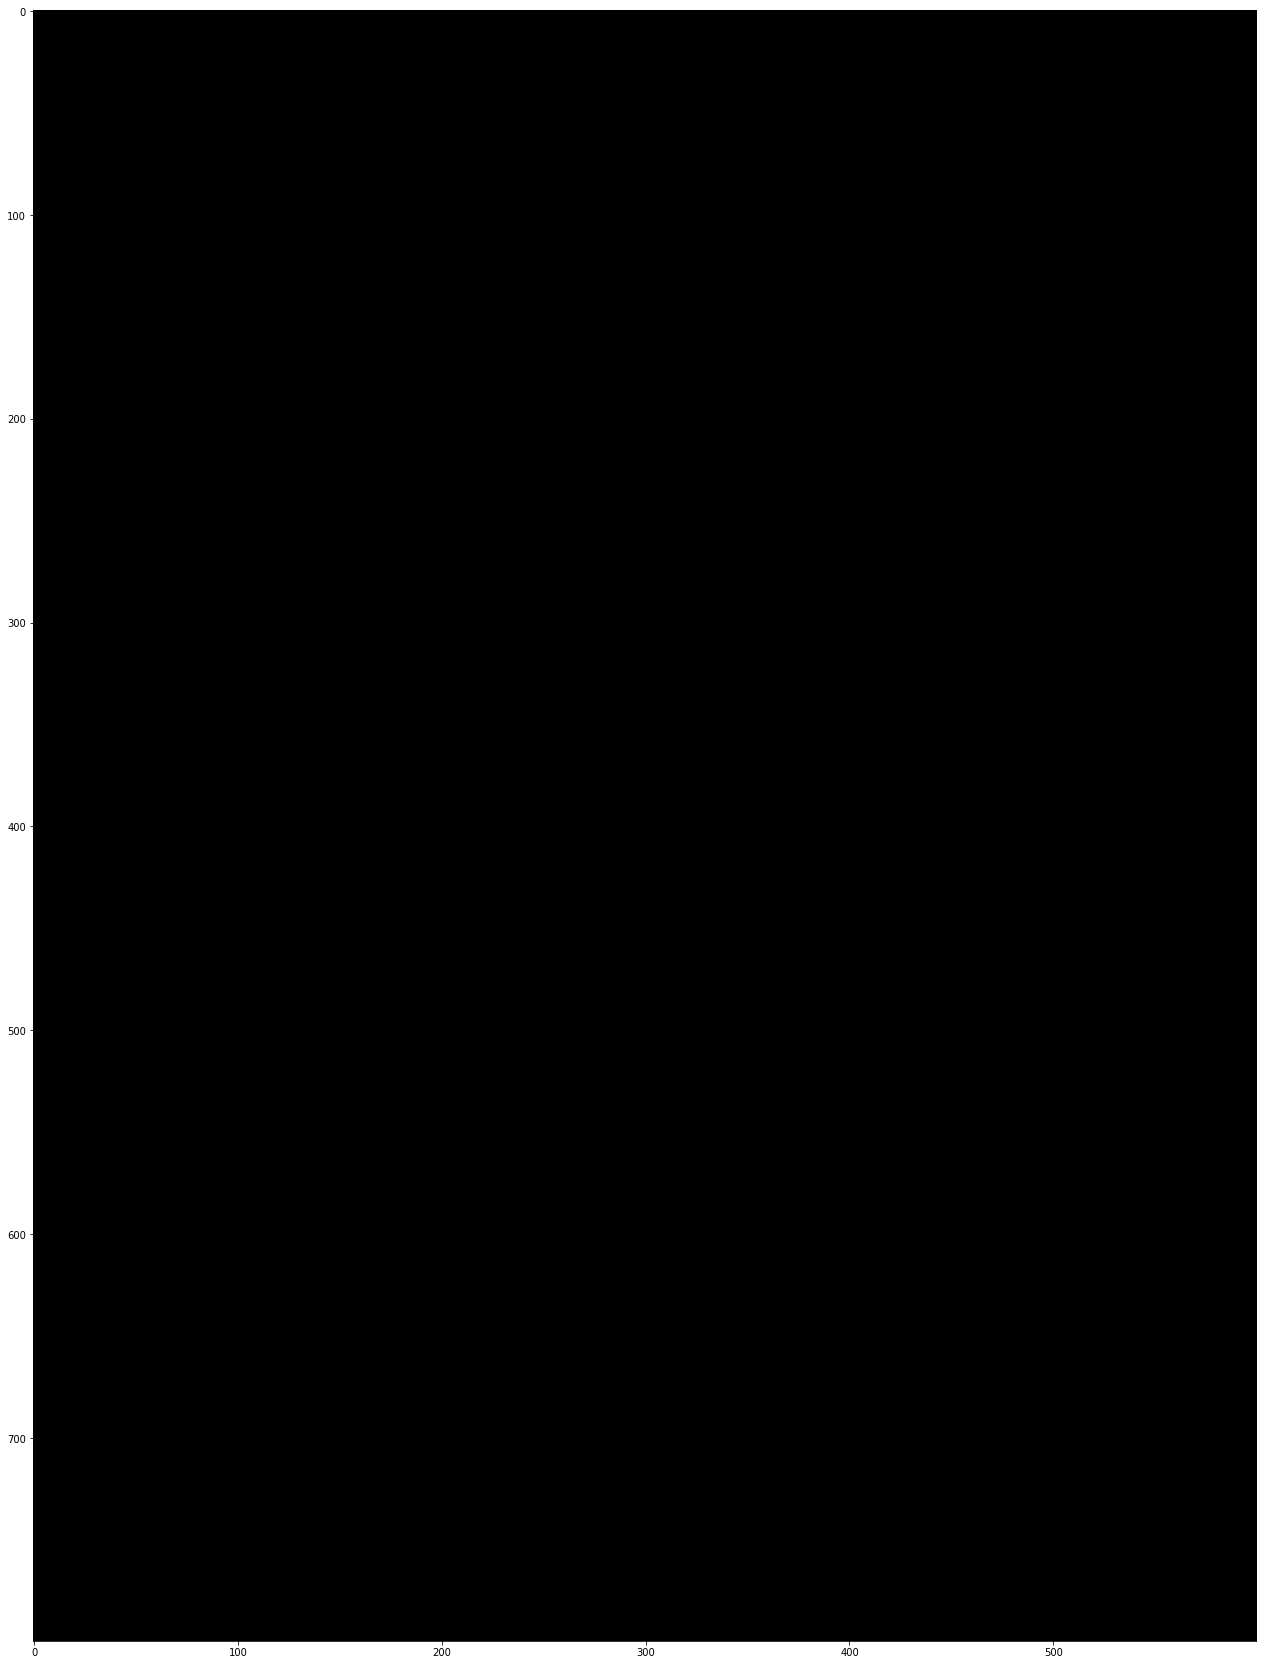

In [22]:
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

# range de tons de verde
lower_green = np.array([21,  35, 194])
upper_green = np.array([22,  39, 192])

# Imagem binaria com pixels presentes no range fornecido
mask = cv2.inRange(img_color, lower_green, upper_green)

# Bitwise-AND utilizando a mask gerada
res = cv2.bitwise_and(img_color, img_color, mask= mask)

plt.imshow(res)

In [20]:
img_hsv[0]

array([[ 21,  35, 194],
       [ 21,  35, 194],
       [ 21,  35, 194],
       ...,
       [ 22,  39, 192],
       [ 22,  39, 192],
       [ 22,  39, 192]], dtype=uint8)

# Achar contornos


In [ ]:
cnts, hier = cv2.findContours(img_gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)